In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
data =  pd.read_csv('coffee_sales.csv')
data.shape


(1133, 6)

In [3]:
data.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


In [5]:
data.drop(columns=['datetime'], inplace=True)
data.head()          

,date,cash_type,card,money,coffee_name
0,2024-03-01,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,card,ANON-0000-0000-0004,38.7,Latte


In [6]:
print("Number of Columns: ",data.shape[1])
print("Number of Rows: ",data.shape[0])

Number of Columns:  5
Number of Rows:  1133


In [7]:
data.isnull().sum()


date            0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [8]:
#drop null rows
data.dropna(subset=['card'],inplace=True)
data.isnull().sum()



date           0
cash_type      0
card           0
money          0
coffee_name    0
dtype: int64

In [9]:
print("Number of Duplicate Entries: ", data.duplicated().sum())

Number of Duplicate Entries:  114


In [10]:
#drop duplicate values
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [11]:
data['cash_type'].value_counts()

cash_type
card    930
Name: count, dtype: int64

In [12]:
data.drop(columns=['cash_type'],inplace=True)

In [13]:
data.shape

(930, 4)

In [14]:
data['coffee_name'].value_counts()

coffee_name
Americano with Milk    224
Latte                  201
Cappuccino             157
Americano              127
Cortado                 85
Hot Chocolate           63
Espresso                43
Cocoa                   30
Name: count, dtype: int64

In [15]:
data['date'] = pd.to_datetime(data['date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 930 entries, 0 to 1132
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         930 non-null    datetime64[ns]
 1   card         930 non-null    object        
 2   money        930 non-null    float64       
 3   coffee_name  930 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 36.3+ KB


In [16]:
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

data.drop(columns=['date'],inplace=True)
data.head()


,card,money,coffee_name,year,month,day
0,ANON-0000-0000-0001,38.7,Latte,2024,3,1
1,ANON-0000-0000-0002,38.7,Hot Chocolate,2024,3,1
3,ANON-0000-0000-0003,28.9,Americano,2024,3,1
4,ANON-0000-0000-0004,38.7,Latte,2024,3,1
5,ANON-0000-0000-0005,33.8,Americano with Milk,2024,3,1


In [17]:
#data visualization

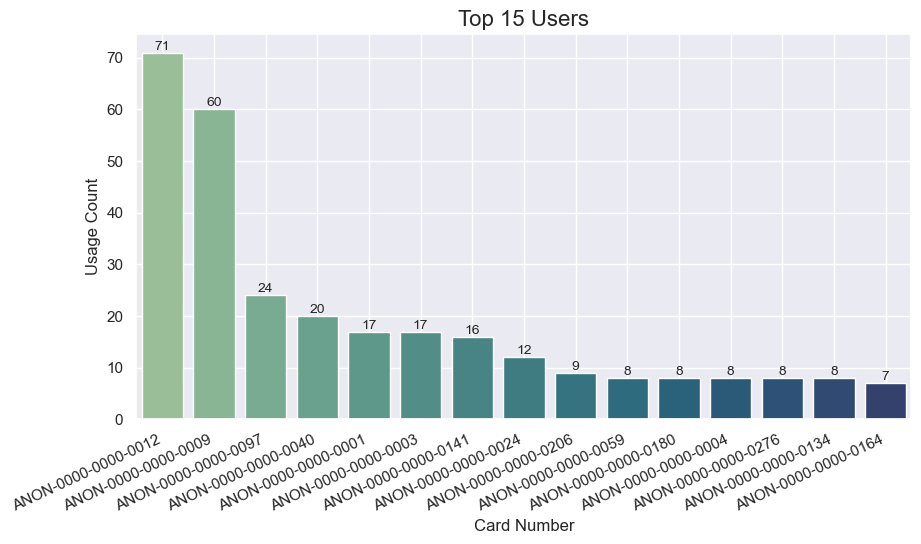

In [18]:
plt.figure(figsize=(10,5))
sns.set_theme()

top_15_cards = data['card'].value_counts().nlargest(15)
ax=sns.barplot(x=top_15_cards.index,y=top_15_cards.values,palette='crest')

for container in ax.containers:
    ax.bar_label(container,fontsize=10)

plt.title('Top 15 Users', fontsize=16)
plt.xlabel('Card Number')
plt.ylabel('Usage Count')
plt.xticks(rotation = 25,ha='right')
plt.grid(True)
plt.show()

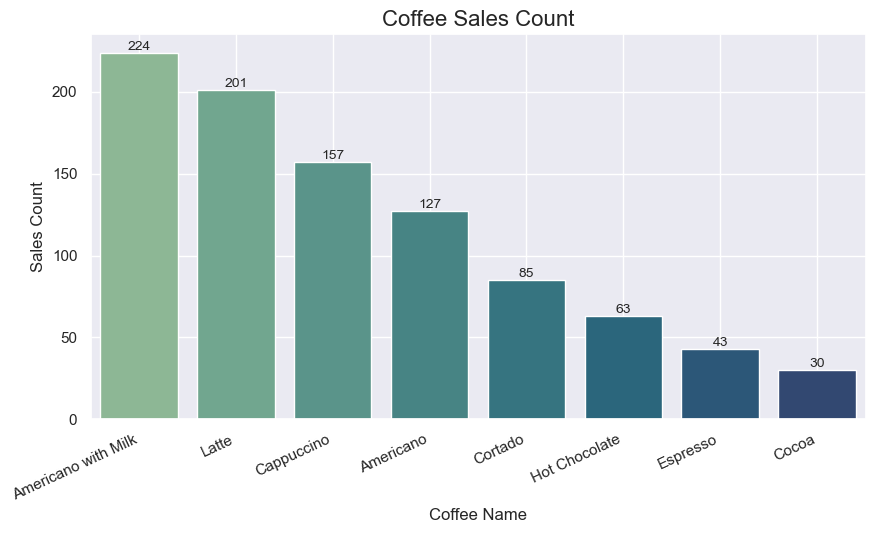

In [19]:
#coffee sales count

plt.figure(figsize=(10,5))
sns.set_theme()

coffee_sales_count = data['coffee_name'].value_counts()
ax=sns.barplot(x=coffee_sales_count.index,y=coffee_sales_count.values,palette='crest')

for container in ax.containers:
    ax.bar_label(container,fontsize=10)

plt.title('Coffee Sales Count', fontsize=16)
plt.xlabel('Coffee Name')
plt.ylabel('Sales Count')
plt.xticks(rotation = 25,ha='right')
plt.grid(True)
plt.show()

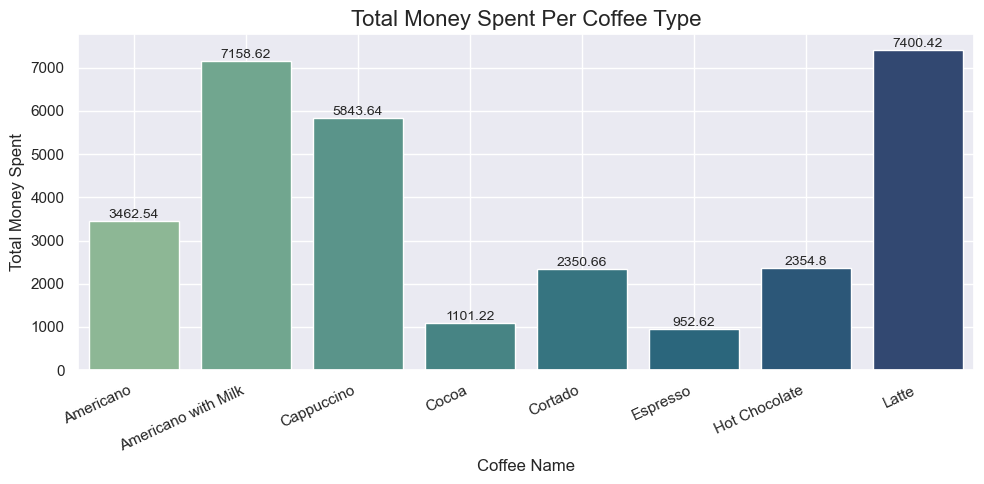

In [20]:
plt.figure(figsize=(10,5))
sns.set_theme()

money_by_coffee = data.groupby('coffee_name')['money'].sum().reset_index()
ax = sns.barplot(x='coffee_name', y='money',data=money_by_coffee,palette='crest')

for container in ax.containers:
    ax.bar_label(container,fontsize=10)

plt.title('Total Money Spent Per Coffee Type', fontsize=16)
plt.xlabel('Coffee Name')
plt.ylabel('Total Money Spent')
plt.xticks(rotation = 25,ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()

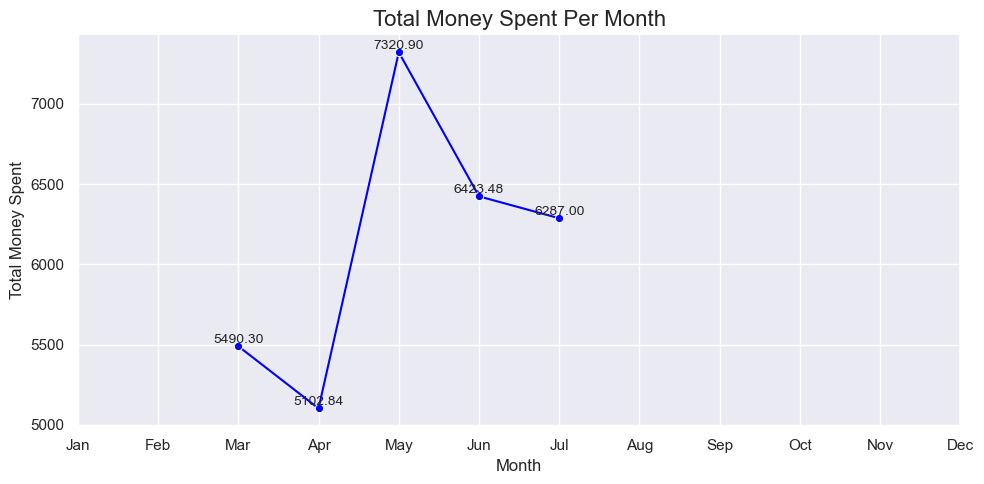

In [21]:
plt.figure(figsize=(10, 5))
sns.set_theme()

money_by_month = data.groupby('month')['money'].sum()
ax = sns.lineplot(x=money_by_month.index, y=money_by_month.values,marker='o', color='blue')

# Add labels to each bar
for x, y in zip(money_by_month.index, money_by_month.values):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Total Money Spent Per Month', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Total Money Spent')

# Fix missing 'Jul' in labels
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.tight_layout()
plt.grid(True)
plt.show()

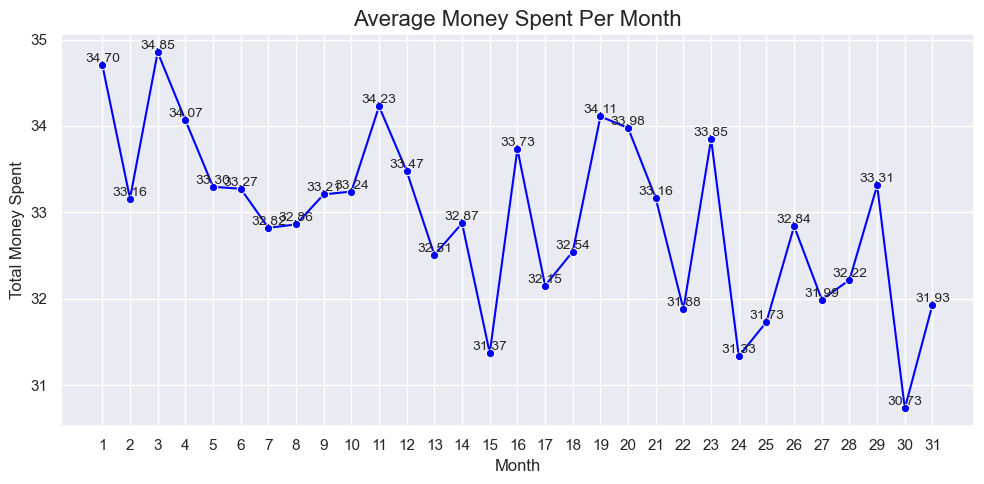

In [29]:
plt.figure(figsize=(10, 5))
sns.set_theme()

money_by_day = data.groupby('day')['money'].mean()
ax = sns.lineplot(x=money_by_day.index, y=money_by_day.values,marker='o', color='blue')

# Add labels to each bar
for x, y in zip(money_by_day.index, money_by_day.values):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Average Money Spent Per Month', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Total Money Spent')
plt.xticks(range(1, 32))
plt.tight_layout()
plt.grid(True)
plt.show()

In [30]:
#label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['card'] = label_encoder.fit_transform(data['card'])
data['coffee_name'] = label_encoder.fit_transform(data['coffee_name'])
data.head()

,card,money,coffee_name,year,month,day
0,0,38.7,7,2024,3,1
1,1,38.7,6,2024,3,1
3,2,28.9,0,2024,3,1
4,3,38.7,7,2024,3,1
5,4,33.8,1,2024,3,1


In [31]:
#Train Test split
from sklearn.model_selection import train_test_split

x=data.drop(columns=['money'])
y=data['money']

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
#decision Tree REgressor Model

from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor()
dtreg.fit(x_train,y_train)

DecisionTreeRegressor()

In [33]:
#model Accuracy Test

score=dtreg.score(x_test,y_test)
score

0.9993829242533991

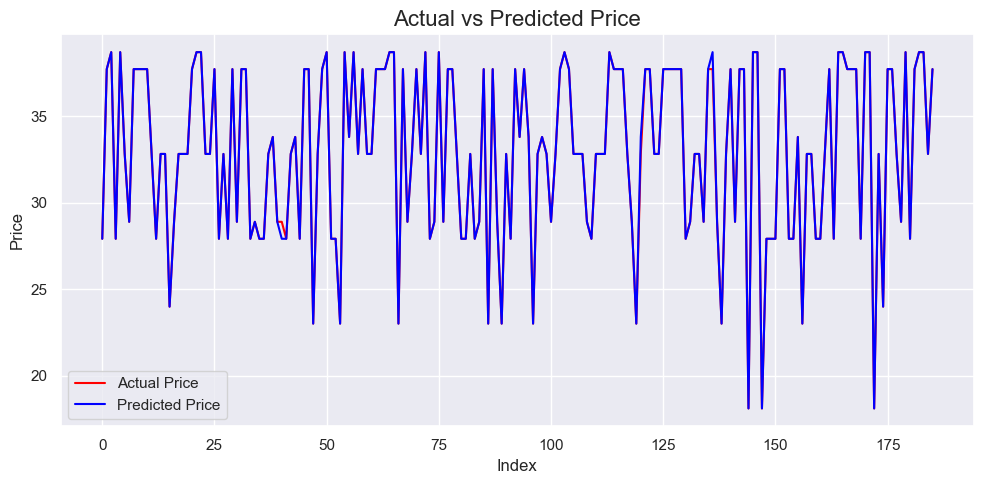

In [34]:
# Predict values
y_pred = dtreg.predict(x_test)

plt.figure(figsize=(10, 5))
sns.set_theme()

# Plot actual prices
sns.lineplot(x=range(len(y_test)), y=y_test, label='Actual Price', color='red')

# Plot predicted prices
sns.lineplot(x=range(len(y_test)), y=y_pred, label='Predicted Price', color='blue')

# Titles and labels
plt.title("Actual vs Predicted Price", fontsize=16)
plt.xlabel('Index')
plt.ylabel('Price')

plt.tight_layout()
plt.grid(True)
plt.show()


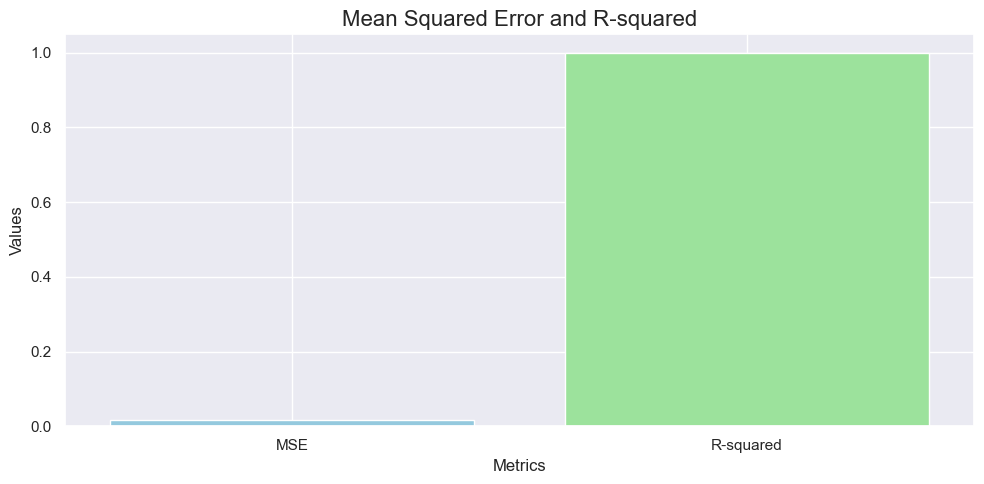

Mean Squared Error (MSE): 0.0155
R-Squared: 0.9994


In [35]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE) and R-Squared (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Metrics and values
metrics = ['MSE', 'R-squared']
values = [mse, r2]

# Plot MSE and R² as a bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=metrics, y=values, palette=['skyblue', 'lightgreen'])

plt.title("Mean Squared Error and R-squared", fontsize=16)
plt.xlabel('Metrics')
plt.ylabel('Values')

plt.tight_layout()
plt.grid(True)
plt.show()

# Print metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-Squared: {r2:.4f}")
